<a href="https://colab.research.google.com/github/michalszczecinski/data-driven-notebooks/blob/master/margin_of_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import pandas as pd

#disable scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

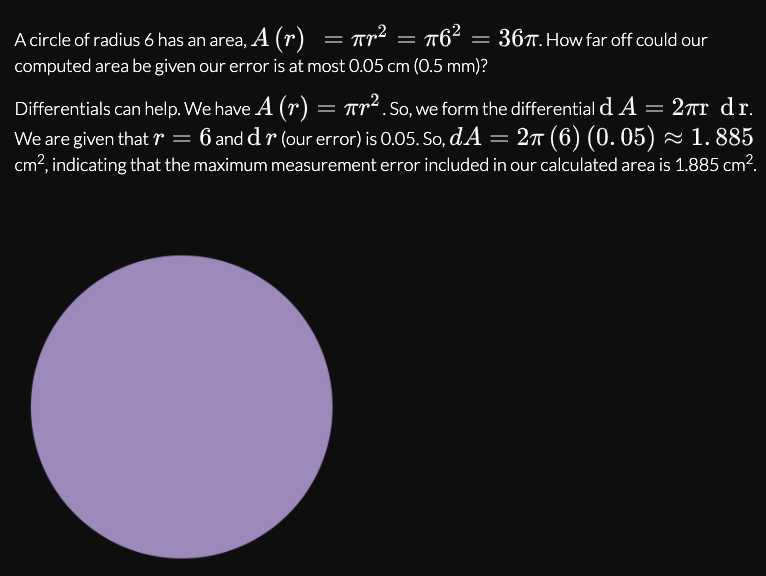

## Error of computed Area in Circle (based on error in radius)

In [2]:
error = 0.05
r = 6

In [3]:
# original radius, no error
A = math.pi *r**2
A

113.09733552923255

In [4]:
#positive error
r1 = r+error
A1 = math.pi *r1**2
diff1 = A1 - A
print(f"Radius: {r1}")
print(f"Area: {A1}")
print(f"Difference: {diff1}")

Radius: 6.05
Area: 114.9901451030204
Difference: 1.8928095737878436


In [5]:
#negative error
r2 = r - error
A2 = math.pi *r2**2
diff2 = A - A2
print(f"Radius: {r2}")
print(f"Area: {A2}")
print(f"Difference: {diff1}")

Radius: 5.95
Area: 111.22023391871267
Difference: 1.8928095737878436


## average error

In [6]:
((A1 - A) + (A - A2))/2

1.8849555921538652

In [7]:
(A1-A2)/2

1.8849555921538652

## differential

$$dA=2*\pi*dr$$

In [8]:
dA= 2* r * math.pi * error
dA

1.8849555921538759

## Table

In [9]:
r_values = np.arange(5.95,6.06,0.01)
A_values = [(math.pi * x**2) for x in r_values]
df = pd.DataFrame({'r': r_values, 'A':A_values})
df['diff'] = 36*math.pi - df['A']
df['abs_diff'] = df['diff'].abs()
df

,r,A,diff,abs_diff
0,5.95000,111.22023,1.87710,1.87710
1,5.96000,111.59440,1.50294,1.50294
2,5.97000,111.96919,1.12815,1.12815
3,5.98000,112.34461,0.75273,0.75273
4,5.99000,112.72066,0.37668,0.37668
5,6.00000,113.09734,0.00000,0.00000
6,6.01000,113.47464,-0.37731,0.37731
7,6.02000,113.85257,-0.75524,0.75524
8,6.03000,114.23114,-1.13380,1.13380
9,6.04000,114.61033,-1.51299,1.51299


In [10]:
df.describe()

,r,A,diff,abs_diff
count,11.00000,11.00000,11.00000,11.00000
mean,6.00000,113.10048,-0.00314,1.02816
std,0.03317,1.25034,1.25034,0.63289
min,5.95000,111.22023,-1.89281,0.00000
25%,5.97500,112.15690,-0.94452,0.56502
50%,6.00000,113.09734,0.00000,1.12815
75%,6.02500,114.04186,0.94044,1.50796
max,6.05000,114.99015,1.87710,1.89281


### relative error 

In [11]:
dA/A

0.016666666666666666

### percentage error

In [12]:
dA/A * 100

1.6666666666666667

Science is filled with measurements, from rulers to lasers. But devices, even highly accurate ones, only measure to a certain level of accuracy. Linear approximation and differentials approximate the change in the values for small changes, which, in the case of science, is often measurement error.  